# Hogere orde benaderingen

Gebruik zowel forward Euler-integratie als Heun-integratie om de vergelijking $u'(t) = u(t)$ (met beginconditie $u(0)= 1$) op te lossen. Maak plots van de twee benaderingen tussen $t=0$ en $t = 1$  en laat het verschil in nauwkeurigheid van de twee methoden zien.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

Allereerst definiëren we een functie om de euler integratie toe te passen.

In [2]:
def euler_method(num_steps):
    """Original Euler Method"""
    steps, delta = np.linspace(0, 1, num=num_steps, retstep=True)
    
    h = np.zeros(num_steps)
    h[0] = 1
    
    for step in range(num_steps - 1):
        h[step + 1] = h[step] + h[step] * delta
    
    return h

Hierna definiëren we een functie om de heun integratie toe te passen.

In [3]:
def heun_method(num_steps):
    """Heun Method"""
    steps, delta = np.linspace(0, 1, num=num_steps, retstep=True)
    
    euler_result = euler_method(num_steps)
    h = np.zeros(num_steps)
    h[0] = 1
    
    for step in range(num_steps - 1):
        h[step + 1] = h[step] + 0.5 * (h[step] + euler_result[step + 1]) * delta
    
    return h

### Euler method

steps:   5; deviation from e: 0.2768755784590451
steps:  10; deviation from e: 0.13710703674584712
steps:  20; deviation from e: 0.06824750181860084
steps: 100; deviation from e: 0.013602792294307164


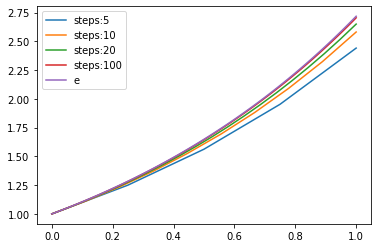

In [4]:
e = np.exp(1.0)

for num_steps in [5, 10, 20, 100]:
    x = euler_method(num_steps)
    x_lim = np.linspace(0, 1, num=num_steps)
    
    e_approx = abs(x[-1] - e)
    plt.plot(x_lim, x, label="steps:{0}".format(num_steps))
    print("steps: {:3d}; deviation from e: {}".format(num_steps, e_approx))
    
    
e = np.exp(x_lim)
plt.plot(x_lim, e, label="e")

plt.legend()
plt.show()

### Heun method

steps:   5; deviation from e: 0.06697567611529509
steps:  10; deviation from e: 0.03106360309696843
steps:  20; deviation from e: 0.014987559705212039
steps: 100; deviation from e: 0.0029156084896357903


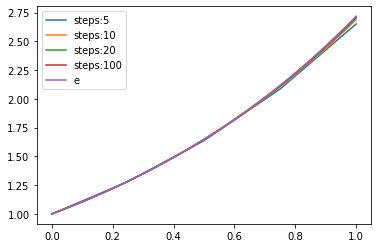

In [5]:
e = np.exp(1.0)

for num_steps in [5, 10, 20, 100]:
    x = heun_method(num_steps)
    x_lim = np.linspace(0, 1, num=num_steps)
    
    e_approx = abs(x[-1] - e)
    plt.plot(x_lim, x, label="steps:{0}".format(num_steps))
    print("steps: {:3d}; deviation from e: {}".format(num_steps, e_approx))
    
    
e = np.exp(x_lim)
plt.plot(x_lim, e, label="e")

plt.legend()
plt.show()

## Resultaten
Zoals in de bovenste twee plots te zien is de Heun methode nauwkeuriger dan de Euler methode.

Dit verschil ligt in het feit dat bij de Heun methode het gemiddelde genomen wordt om zo de error van de originele Euler methode te corrigeren. Heuns methode wordt omwille hiervan ook wel de 'improved Euler method' genoemd.